# CNN Training for the image -> sensors extraction

64x64x3 -> 20 vector of sensoric values (angle and track lidar sensor)

VUT FIT 2022
Master thesis - Application of Reinforcement Learning in Autonomous Driving
xvosol00

In [ ]:
!pip3 install torch==1.2.0+cu92 torchvision==0.4.0+cu92 -f https://download.pytorch.org/whl/torch_stable.html

In [ ]:
# import torch
# import torch.nn as nn
# import torch.nn.functional as F
# import torchvision
# import torchvision.transforms as transforms

print(torch.__version__)

## Importing the Data


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#loading the pickled file
import pickle


with open('pickled_samples_train.pkl', 'rb') as pkl:
  dataset_dict = pickle.load(pkl)
  print(dataset_dict)
  print( type(dataset_dict) )


In [ ]:
#DVO dataset
import pandas as pd
import pickle
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import numpy as np
from torch.utils.data import (
    Dataset,
    DataLoader,
)

class CustomDataset(Dataset):
    def __init__(self, root_dir, transform=None):
      self.len = 0
      with open(root_dir, 'rb') as pkl:
        try:
          self.dataset_dict = pickle.load(pkl)
          self.labels = torch.stack(self.dataset_dict['labels']).squeeze(1)
          self.images = torch.stack(self.dataset_dict['data']).squeeze(1)

          # self.labels = torch.from_numpy( self.labels)
          # self.images = torch.from_numpy(self.images)

          self.len += len(self.dataset_dict['labels'])  
          print( len(self.dataset_dict['labels']) )

          while True:
            
            self.dataset_dict = pickle.load(pkl)
            
            self.labels = torch.cat( ( self.labels, torch.stack(self.dataset_dict['labels']).squeeze(1) ) ) #np.append(self.labels, np.asarray(self.dataset_dict['labels']) )  #np.hstack( ( self.labels, np.asarray(self.dataset_dict['labels]) ) )
            self.images = torch.cat( ( self.images, torch.stack(self.dataset_dict['data']).squeeze(1) ) ) #np.append(self.images, np.asarray(self.dataset_dict['data']))
            self.len += len(self.dataset_dict['labels'])
            
            print('total_size:: ', self.len)
            print( len(self.dataset_dict['labels']) )
        
        except EOFError:
          print('dataset was read')
          print('total_size:: ', self.len)

          # self.labels = np.flatten( self.labels, axis=0 )
          # self.images = np.flatten( self.images, axis=0 )
          # print(self.dataset_dict)
          # print( type(self.dataset_dict) )
          # print(self.labels[0].shape )
        print('labels shape:: ', self.labels.shape)
        print('images shape:: ', self.images.shape)
        print('images[0].shape:: ', self.images[0].shape)

        # self.images = torch.Tensor(self.images)
        # self.labels = torch.Tensor(self.labels)
        

        # self.annotations = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform
        # self.len = len(self.dataset_dict['labels'])


        # print('len:: ', self.len)
        # print('lenn:: ', image[0].shape )
        # print(self.dataset_dict.items() )

    def __len__(self):
        return self.len #len(self.annotations)

    def __getitem__(self, index):
        # img_path = os.path.join(self.root_dir, self.annotations.iloc[index, 0])
        # image = io.imread(img_path)
        # y_label = torch.tensor(int(self.annotations.iloc[index, 1]))

        image = self.images[index]
        label = self.labels[index]
        
        #already normalized 
        if self.transform:
            image = self.transform(image)

        return (image, label)


# Hyperparameters
# in_channel = 3
# num_classes = 2
learning_rate = 1e-3
batch_size = 32
num_epochs = 10

# Load Data
dataset = CustomDataset(
    root_dir='/content/drive/MyDrive/pickled_samples_train.pkl',
    transform=None, #transforms.ToTensor()
)

# dataset = TensorDataset(dataset)

#10668 num of episodes....
train_size = int(np.ceil((10668) * 7 / 10))
test_size = int(np.floor((10668) * 3 / 10))


# print(train_size)



#Loading the dataset
# train_set, test_set = torch.utils.data.random_split(dataset, [train_size, test_size])
# train_loader = DataLoader(dataset=train_set, batch_size=batch_size, shuffle=True)
# test_loader = DataLoader(dataset=test_set, batch_size=batch_size, shuffle=True)


43
total_size::  76
33
total_size::  109
33
total_size::  142
33
total_size::  175
33
total_size::  208
33
total_size::  241
33
total_size::  274
33
total_size::  307
33
total_size::  342
35
total_size::  375
33
total_size::  408
33
total_size::  509
101
total_size::  617
108
total_size::  867
250
total_size::  958
91
total_size::  997
39
total_size::  1263
266
total_size::  1455
192
total_size::  1565
110
total_size::  1692
127
total_size::  1725
33
total_size::  1983
258
total_size::  2082
99
total_size::  2338
256
total_size::  2406
68
total_size::  2487
81
total_size::  2595
108
total_size::  2679
84
total_size::  2772
93
total_size::  2885
113
total_size::  2927
42
total_size::  2987
60
total_size::  3048
61
total_size::  3110
62
total_size::  3167
57
total_size::  3228
61
total_size::  3288
60
total_size::  3348
60
total_size::  3407
59
total_size::  3465
58
total_size::  3498
33
total_size::  3569
71
total_size::  3615
46
total_size::  3657
42
total_size::  3701
44
total_size:: 

In [ ]:
#Loading the dataset
train_set, test_set = torch.utils.data.random_split(dataset, [train_size, test_size], generator=torch.Generator().manual_seed(42))

# from torch.utils.data import TensorDataset
# train_set_tensor = TensorDataset(train_set)
# test_set_tensor = TensorDataset(test_set)

train_loader = DataLoader(dataset=train_set, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_set, batch_size=batch_size, shuffle=True)


print(train_set[0])
# print(dataset.images[0].shape)

# torch_images = [ torch.tensor(k) for k in dataset.images ]
# print( type(torch_images) )

# torch_images = torch.tensor( torch_images )

# print(train_loader)


(tensor([[[0.4000, 0.3922, 0.3765,  ..., 0.4078, 0.4000, 0.4039],
         [0.3882, 0.4039, 0.3804,  ..., 0.4157, 0.4078, 0.4078],
         [0.3765, 0.3961, 0.4000,  ..., 0.4235, 0.4118, 0.4039],
         ...,
         [0.3451, 0.3451, 0.3451,  ..., 0.3451, 0.3451, 0.3451],
         [0.3451, 0.3451, 0.3451,  ..., 0.3451, 0.3451, 0.3451],
         [0.3451, 0.3451, 0.3451,  ..., 0.3451, 0.3451, 0.3451]],

        [[0.3961, 0.3843, 0.3725,  ..., 0.4118, 0.4039, 0.4039],
         [0.3882, 0.4000, 0.3765,  ..., 0.4157, 0.4078, 0.4039],
         [0.3765, 0.3922, 0.3961,  ..., 0.4235, 0.4118, 0.4039],
         ...,
         [0.5020, 0.5020, 0.5020,  ..., 0.5020, 0.5020, 0.5020],
         [0.5020, 0.5020, 0.5020,  ..., 0.5020, 0.5020, 0.5020],
         [0.5020, 0.5020, 0.5020,  ..., 0.5020, 0.5020, 0.5020]],

        [[0.3882, 0.3765, 0.3608,  ..., 0.3961, 0.3922, 0.3961],
         [0.3804, 0.3961, 0.3725,  ..., 0.4039, 0.4000, 0.3922],
         [0.3686, 0.3843, 0.3882,  ..., 0.4157, 0.4000, 0

## the Data


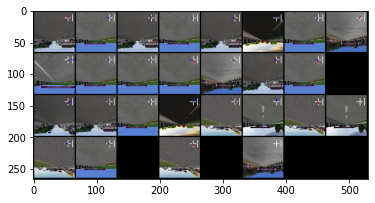

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

## functions to show an image
def imshow(img):
    #img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

## get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

## show images
imshow(torchvision.utils.make_grid(images))

**EXERCISE:** Try to understand what the code above is doing. This will help you to better understand your dataset before moving forward. 

Let's check the dimensions of a batch.

In [ ]:
for images, labels in train_loader:
    print("Image batch dimensions:", images.shape)
    print("Image label dimensions:", labels.shape)
    break

Image batch dimensions: torch.Size([32, 3, 64, 64])
Image label dimensions: torch.Size([32, 20])


## The Model


In [ ]:
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()

        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool2 = nn.AvgPool2d(2, 2)  #AvgPool2d or one pooling with 4,4? , bcs maxPool is for black_white images the best
        self.conv11 = nn.Conv2d(6, 6, 5)
        self.pool4 = nn.AvgPool2d(4, 4)
        self.conv2= nn.Conv2d(6, 16, 5)
        # if img_num == 2:
        #     self.fc2 = nn.Linear(1344, hidden_cnn)      #1344 #TODO DVO maybe this will have to be changed -> if img_num == 2 WILL BE MORE..
        # else:
        self.fc2 = nn.Linear(576, 512)          #used to be 90...instead of 256    COMPARE PAK s temi 90 (run 21-12-12 cas)
        self.fc3 = nn.Linear(512, 20)               #+ jeste bez LIDARu to zkusit    #120 misto 60 pro 1 img


    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool2(F.relu(self.conv11(x)))
        x = self.pool4(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc2(x))
        x = self.fc3(x)

        return x

test the model with 1 batch to ensure that the output dimensions are correct

In [ ]:
## test the model with 1 batch
model = MyModel()
for images, labels in train_loader:
    print("batch size:", images.shape)
    out = model(images)
    print(out.shape)
    break

batch size: torch.Size([32, 3, 64, 64])
torch.Size([32, 20])


## Training

In [ ]:
learning_rate = 0.001
num_epochs = 200

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = MyModel()
model = model.to(device)
criterion = nn.MSELoss() #nn.CrossEntropyLoss() MseLoss ??? nn.L1Loss - MAE Loss
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
## compute accuracy
def get_accuracy(res, target, batch_size):
    ''' Obtain accuracy for training round '''
    # dev = torch.abs(0.1 * target)
    corrects = (torch.abs(target - res) < 0.1).sum()
    # if res + dev < target
    corrects = #spocitat u kolika je difference within 10%, nebo total % , nebo avg %
    # corrects = (torch.max(logit, 1)[1].view(target.size()).data == target.data).sum()
    # accuracy = 100.0 * corrects/batch_size
    return accuracy.item()

training.

In [ ]:
for epoch in range(num_epochs):
    train_running_loss = 0.0
    train_acc = 0.0

    model = model.train()

    ## training step
    for i, (images, labels) in enumerate(train_loader):
        
        images = images.to(device)
        labels = labels.to(device)

        ## forward + backprop + loss
        logits = model(images)
        loss = criterion(logits, labels)
        optimizer.zero_grad()
        loss.backward()

        ## update model params
        optimizer.step()

        train_running_loss += loss.detach().item()
        # train_acc += get_accuracy(logits, labels, BATCH_SIZE)
        train_acc = 100
    
    model.eval()
    print('Epoch: %d | Loss: %.4f | Train Accuracy: %.2f' \
          %(epoch, train_running_loss / i, train_acc/i))        

Epoch: 0 | Loss: 0.0661 | Train Accuracy: 0.43
Epoch: 1 | Loss: 0.0635 | Train Accuracy: 0.43
Epoch: 2 | Loss: 0.0631 | Train Accuracy: 0.43
Epoch: 3 | Loss: 0.0632 | Train Accuracy: 0.43
Epoch: 4 | Loss: 0.0633 | Train Accuracy: 0.43
Epoch: 5 | Loss: 0.0631 | Train Accuracy: 0.43
Epoch: 6 | Loss: 0.0628 | Train Accuracy: 0.43
Epoch: 7 | Loss: 0.0627 | Train Accuracy: 0.43
Epoch: 8 | Loss: 0.0624 | Train Accuracy: 0.43
Epoch: 9 | Loss: 0.0622 | Train Accuracy: 0.43
Epoch: 10 | Loss: 0.0621 | Train Accuracy: 0.43
Epoch: 11 | Loss: 0.0620 | Train Accuracy: 0.43
Epoch: 12 | Loss: 0.0620 | Train Accuracy: 0.43
Epoch: 13 | Loss: 0.0619 | Train Accuracy: 0.43
Epoch: 14 | Loss: 0.0618 | Train Accuracy: 0.43
Epoch: 15 | Loss: 0.0619 | Train Accuracy: 0.43
Epoch: 16 | Loss: 0.0618 | Train Accuracy: 0.43
Epoch: 17 | Loss: 0.0618 | Train Accuracy: 0.43
Epoch: 18 | Loss: 0.0617 | Train Accuracy: 0.43
Epoch: 19 | Loss: 0.0616 | Train Accuracy: 0.43
Epoch: 20 | Loss: 0.0616 | Train Accuracy: 0.43
Ep

KeyboardInterrupt: ignored

computation of the accuracy on the testing dataset to see how well the model performs

In [ ]:
#0.0599 - 0.0598
#0.0625

# torch.save(model, 'model2.pth')


test_acc = 0.0
for i, (images, labels) in enumerate(test_loader, 0):
    images = images.to(device)
    labels = labels.to(device)
    outputs = model(images)
    print('Example:: ', i)
    print(labels[i])
    print(outputs[i])
    # test_acc += get_accuracy(outputs, labels, BATCH_SIZE)
        
print('Test Accuracy: %.2f'%( test_acc/i))

Example::  0
tensor([-0.0121,  0.0365,  0.0717,  0.1048,  0.1656,  0.3286,  0.9020,  0.8731,
         0.8461,  0.8256,  0.8038,  0.7804,  0.7550,  0.7157,  0.6720,  0.5962,
         0.4696,  0.3252,  0.2153,  0.0944], device='cuda:0')
tensor([-0.0150,  0.0332,  0.1018,  0.2233,  0.3460,  0.3817,  0.3997,  0.4023,
         0.4182,  0.4193,  0.4254,  0.4235,  0.4169,  0.4076,  0.4037,  0.3888,
         0.3366,  0.2653,  0.2190,  0.1189], device='cuda:0',
       grad_fn=<SelectBackward0>)
Example::  1
tensor([-2.3167e-04,  2.8224e-02,  6.1131e-02,  9.5477e-02,  1.6208e-01,
         2.8068e-01,  4.4342e-01,  6.4221e-01,  1.0000e+00,  1.0000e+00,
         1.0000e+00,  1.0000e+00,  1.0000e+00,  1.0000e+00,  9.4897e-01,
         5.8581e-01,  3.3227e-01,  1.9378e-01,  1.2343e-01,  5.6670e-02],
       device='cuda:0')
tensor([-0.0203,  0.0223,  0.0769,  0.1236,  0.2397,  0.3226,  0.4287,  0.4967,
         0.5426,  0.5677,  0.5921,  0.6074,  0.6241,  0.6422,  0.6297,  0.5366,
         0.4378,  0

IndexError: ignored